<a href="https://colab.research.google.com/github/JSJeong-me/JBNU-2021/blob/main/Predictive_Analytics/decision_tree/12_3xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### XGBoosting Easy version + Aggregated Data Set

In [1]:
import numpy as np                   # array, vector, matrix calculations
import pandas as pd                  # DataFrame handling
#import shapely                          # for consistent, signed variable importance measurements
import xgboost as xgb                # gradient boosting machines (GBMs)
import math

import matplotlib.pyplot as plt      # plotting
pd.options.display.max_columns = 999 # enable display of all columns in notebook

# enables display of plots in notebook
%matplotlib inline

np.random.seed(42)                # set random seed for reproducibility

In [2]:
# import XLS file
path1 = "./credit_cards_dataset.csv"
#data = pd.read_excel(path, skiprows=1) # skip the first row of the spreadsheet

path2 = "./Data_USD.csv"
#path = 'C:\\Users\\User\\Desktop\\data\\original_data.csv'
#data = pd.read_csv(path, skiprows=1) # skip the first row of the spreadsheet
data1 = pd.read_csv(path1) # skip the first row of the spreadsheet
data2 = pd.read_csv(path2) # skip the first row of the spreadsheet
# remove spaces from target column name

In [ ]:
data1.shape

In [ ]:
data2.shape

In [4]:
data2['ID']=np.nan

In [5]:
for i in range(0,30000):
    data2.loc[i,['ID']]=i+1

In [ ]:
data2.tail(5)

In [ ]:
data2.head(5)

In [6]:
data2=data2.drop('DEFAULT_PAYMENT_NEXT_MO', axis =1)

In [ ]:
data2.shape

In [7]:
#pd.merge(data1, data2, on="key", how="outer")
data_sum = pd.merge(data2, data1, on="ID", how="left")

In [8]:
data_sum = data_sum.drop('ID', axis =1)

In [ ]:
data_sum.shape

In [ ]:
data_sum.head(5)

In [9]:
#data = data_sum.rename(columns={'DEFAULT_PAYMENT_NEXT_MONTH': 'DEFAULT_NEXT_MONTH'})
data=data_sum

In [10]:
# assign target and inputs for GBM
#y = 'DEFAULT_NEXT_MONTH'
y='default.payment.next.month'
X = [name for name in data.columns if name not in ['ID', 'DEFAULT_PAYMENT_NEXT_MO','SEX_y', 'EDUCATION_y', 'MARRIAGE_y', 'AGE_y', 'default.payment.next.month']]
print('y =', y)
print('X =', X)

y = default.payment.next.month
X = ['LIMIT_BAL_US', 'SEX_x', 'EDUCATION_x', 'MARRIAGE_x', 'AGE_x', 'PAY_SCORE_AVG', 'BILL_AVG_US', 'PAY_AMT_AVG_US', 'PAY_TO_BILL', 'CREDIT_UTILIZATION', 'LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [ ]:
data[X].shape

(30000, 29)

In [11]:
split_ratio=0.7

# execute split
split = np.random.rand(len(data[X])) < split_ratio
train=data[split]
test=data[~split]

print('Train data rows = %d. columns = %d' % (train.shape[0], train.shape[1]))
print('Test data rows = %d. columns = %d' % (test.shape[0], test.shape[1]))

Train data rows = 21087. columns = 34
Test data rows = 8913. columns = 34


In [ ]:
print(test.shape)

In [ ]:
print(train.shape)

In [12]:
# XGBoost uses SVMLight data structure, not Numpy arrays or Pandas DataFrames 

mod = xgb.XGBRegressor(
    gamma=1,                 
    learning_rate=0.01,
    max_depth=3,
    n_estimators=10000,                                                                    
    subsample=0.8,
    random_state=42,
    verbosity=0
)

In [13]:
mod.fit(train[X], train[y])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=0)

In [14]:
ypred = mod.predict(test[X])

In [15]:
ypred.reshape(-1,1).round(5)

array([[0.38755],
       [0.119  ],
       [0.10218],
       ...,
       [0.95201],
       [0.069  ],
       [0.09482]], dtype=float32)

In [16]:
predictions = np.array([round(value) for value in ypred])

In [17]:
predictions.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
test[y]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [19]:
accuracy = accuracy_score(test[y], predictions)
cm = confusion_matrix(test[y], predictions)
precision = precision_score(test[y], predictions)
recall = recall_score(test[y], predictions)

In [ ]:
print(accuracy)
print(cm)
print(precision)
print(recall)

In [21]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6568  337]
 [1293  715]]


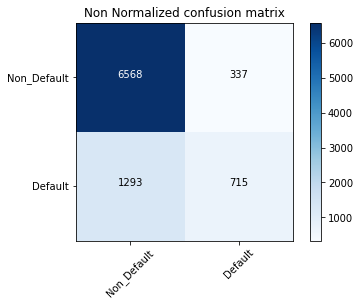

In [22]:
plt.figure()
plot_confusion_matrix(cm, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')